# Analysis of Customer Shopping Dataset

## Importing Required Python Packages

In [94]:
# Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [95]:
# loading the dataset using pandas
shopp_df = pd.read_csv('Downloads/shopping_trends.csv')

In [96]:
# viewing the first 6 rows
shopp_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Basic Information of this Dataset

In [97]:
# shape
shopp_df.shape

(3900, 19)

In [98]:
# Other Information
shopp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [99]:
# Checking missing values
shopp_df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

## Summary Statistics At a Glance

In [100]:
#  Basic Summary Statistics
shopp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


## Dropping Unnecessary Columns

In [101]:
# Dropping unnecessary columns
dropping_col = ['Customer ID', 'Color', 'Review Rating', 'Subscription Status', 'Shipping Type',
                 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Frequency of Purchases', 'Preferred Payment Method', 'Size']
dropping_col = [col for col in dropping_col if col in shopp_df.columns]
shopp_df.drop(columns = dropping_col, inplace = True)

In [102]:
shopp_df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Payment Method
0,55,Male,Blouse,Clothing,53,Kentucky,Winter,Credit Card
1,19,Male,Sweater,Clothing,64,Maine,Winter,Bank Transfer
2,50,Male,Jeans,Clothing,73,Massachusetts,Spring,Cash
3,21,Male,Sandals,Footwear,90,Rhode Island,Spring,PayPal
4,45,Male,Blouse,Clothing,49,Oregon,Spring,Cash
...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,Summer,Cash
3896,52,Female,Backpack,Accessories,49,Iowa,Spring,PayPal
3897,46,Female,Belt,Accessories,33,New Jersey,Spring,Credit Card
3898,44,Female,Shoes,Footwear,77,Minnesota,Summer,PayPal


## Shopping Category Distributions

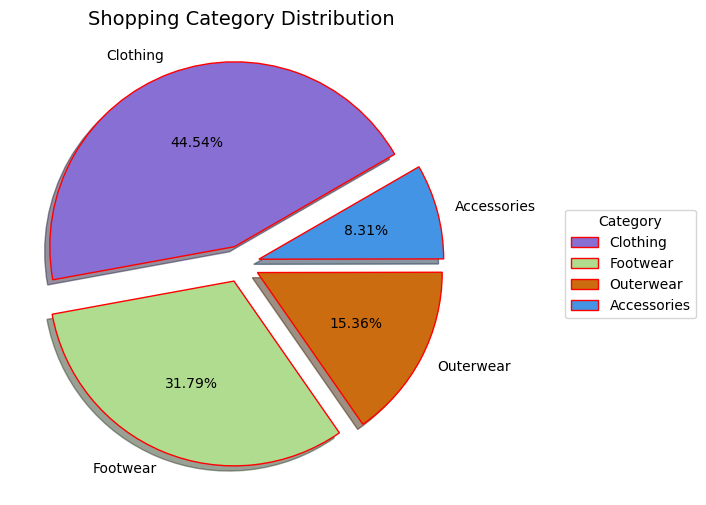

In [133]:
# Setting Figure Size
fig, ax = plt.subplots(figsize=(10, 6))

# Explode data
explode = (0.1, 0.1, 0.1, 0.1)

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "red"}

# Creating Pie Plot
colors = ['#876FD4','#AFDC8F','#CA6C0F','#4394E5'] 
ax.pie(shopp_df['Category'].value_counts(), labels = shopp_df['Category'].unique(), autopct = '%1.2f%%', colors = colors,
      explode = explode, shadow = True, startangle = 30, wedgeprops = wp, textprops=dict(color="black")
      )
ax.legend(title = 'Category', loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

# Handling Plot
ax.set_title('Shopping Category Distribution', fontsize = 14)

# Saving the Figure
plt.savefig('D:/New folder (2)/1.png', dpi=300)

# Viewing the Plot
plt.show()

## Top 15 items By Category

In [107]:
total_item = shopp_df.groupby(['Category', 'Item Purchased'])['Purchase Amount (USD)'].sum().sort_values(ascending = False)
top_15_items = total_item.iloc[:15]
top_15_items.unstack()

Item Purchased,Blouse,Shirt,Dress,Pants,Jewelry,Sunglasses,Belt,Scarf,Sweater,Shorts,Skirt,Hat,Coat,Socks,Jacket
Category,,,,,,,,,,,,,,,
Clothing,10410.0,10332.0,10320.0,10090.0,NaN,NaN,NaN,NaN,9462.0,9433.0,9402.0,NaN,NaN,9252.0,NaN
Accessories,NaN,NaN,NaN,NaN,10010.0,9649.0,9635.0,9561.0,NaN,NaN,NaN,9375.0,NaN,NaN,NaN
Outerwear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9275.0,NaN,9249.0


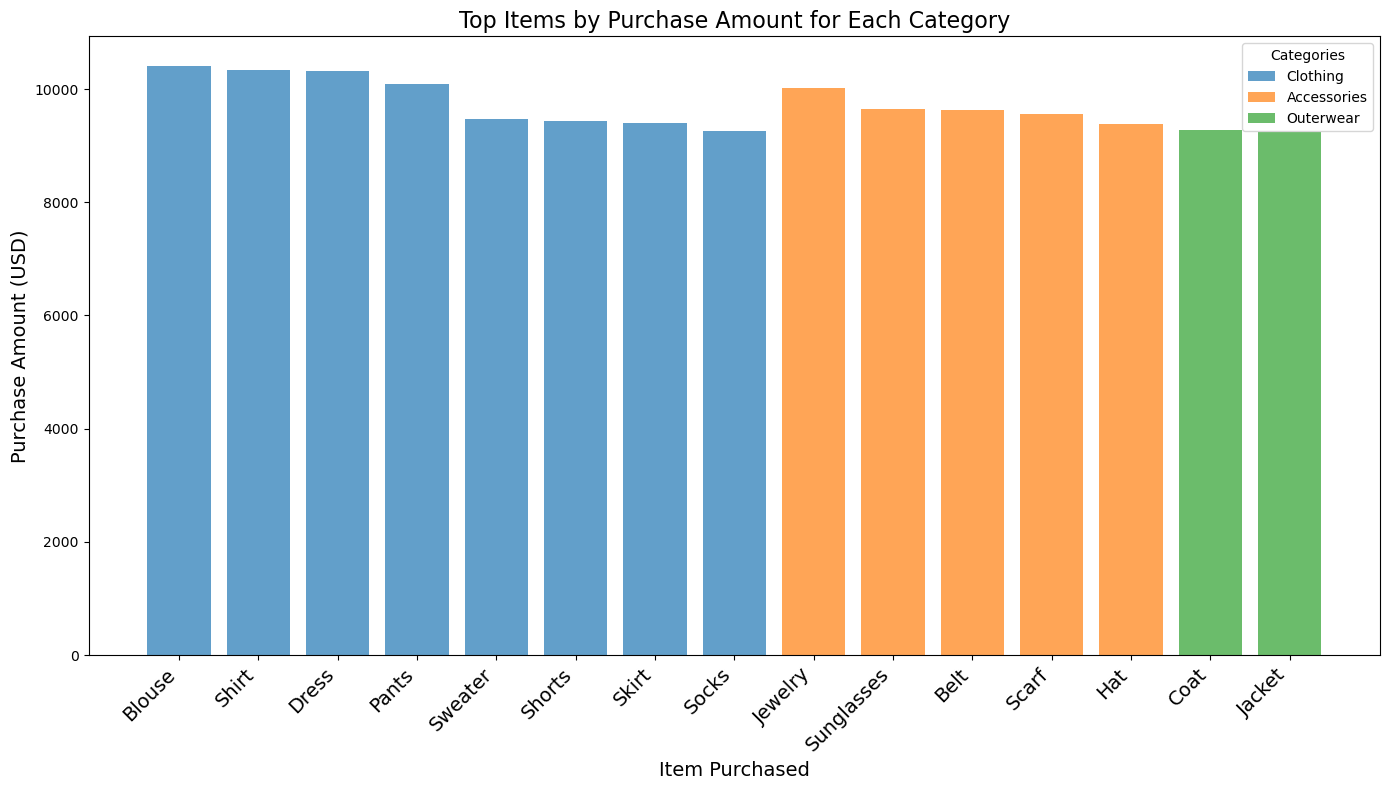

In [108]:
# Resetting the index
top_15_items_reset = top_15_items.reset_index()

# Getting unique categories
categories = top_15_items_reset['Category'].unique()

# Creating the figure
plt.figure(figsize=(14, 8))

# Code for plotting
for category in categories:
    # Filtering data for the current category
    category_data = top_15_items_reset[top_15_items_reset['Category'] == category]
    
    # Plot the bar chart for the current category
    plt.bar(
        category_data['Item Purchased'], 
        category_data['Purchase Amount (USD)'], 
        label=category,
        alpha=0.7
    )

# Customization of the plot
plt.title('Top Items by Purchase Amount for Each Category', fontsize=16)
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.legend(title='Categories')

# Adjusting layout for better fitting
plt.tight_layout()

# Saving the Figure
plt.savefig('D:/New folder (2)/2.png', dpi=300)

# Show the plot
plt.show()

## Shopping By Age

In [109]:
purchase_by_age = shopp_df.groupby('Age')['Purchase Amount (USD)'].sum().reset_index()
purchase_by_age.head()

,Age,Purchase Amount (USD)
0,18,4139
1,19,4941
2,20,3424
3,21,4423
4,22,4011


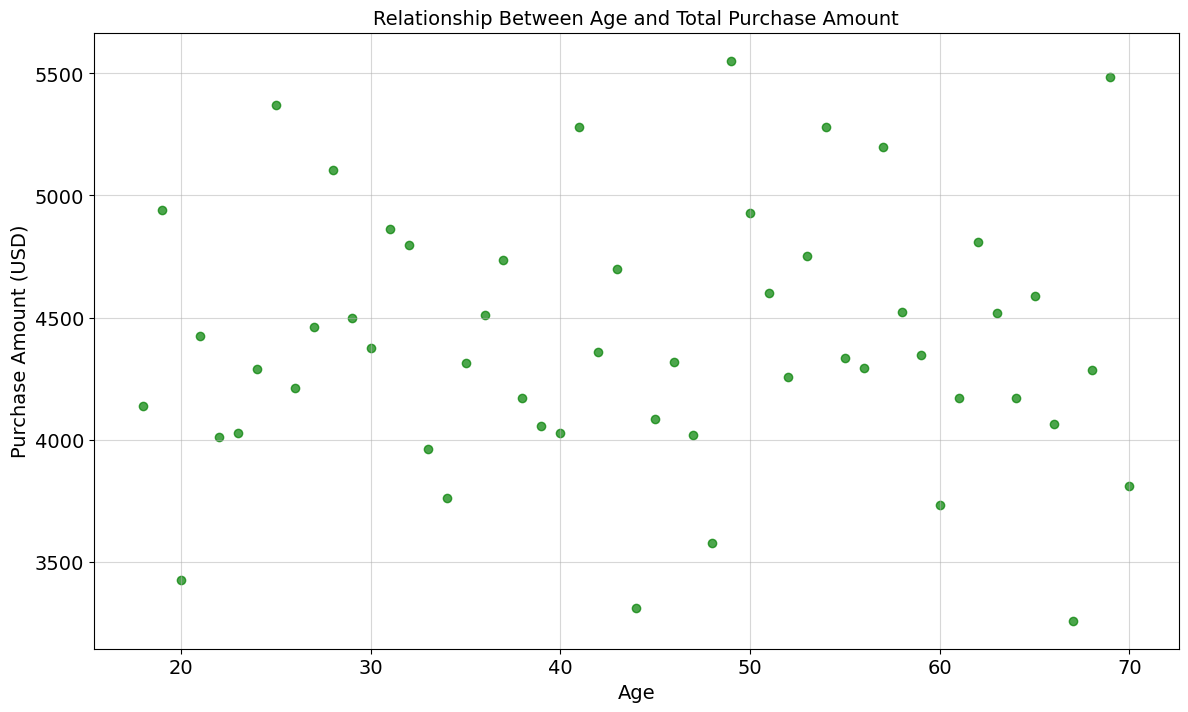

In [110]:
# Setting Figure Size
plt.figure(figsize=(14, 8))

# Creating Scatter Plot
plt.scatter(purchase_by_age['Age'], purchase_by_age['Purchase Amount (USD)'], alpha=0.7, color='green')

# Plotting Style
plt.xlabel('Age', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.title('Relationship Between Age and Total Purchase Amount', fontsize=14)
plt.xticks(rotation=0, fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha=0.5)

# Saving the Figure
plt.savefig('D:/New folder (2)/3.png', dpi=300)

# Showing Plot
plt.show()

## Shopping of Customers Age From 20 to 35

In [131]:
total_item_20_35 = shopp_df[(shopp_df['Age'] >= 20) & (shopp_df['Age'] <= 35)].groupby('Item Purchased')['Purchase Amount (USD)']\
.sum().reset_index()
total_item_20_35.head()

,Item Purchased,Purchase Amount (USD)
0,Backpack,2983
1,Belt,3083
2,Blouse,2974
3,Boots,2605
4,Coat,2959


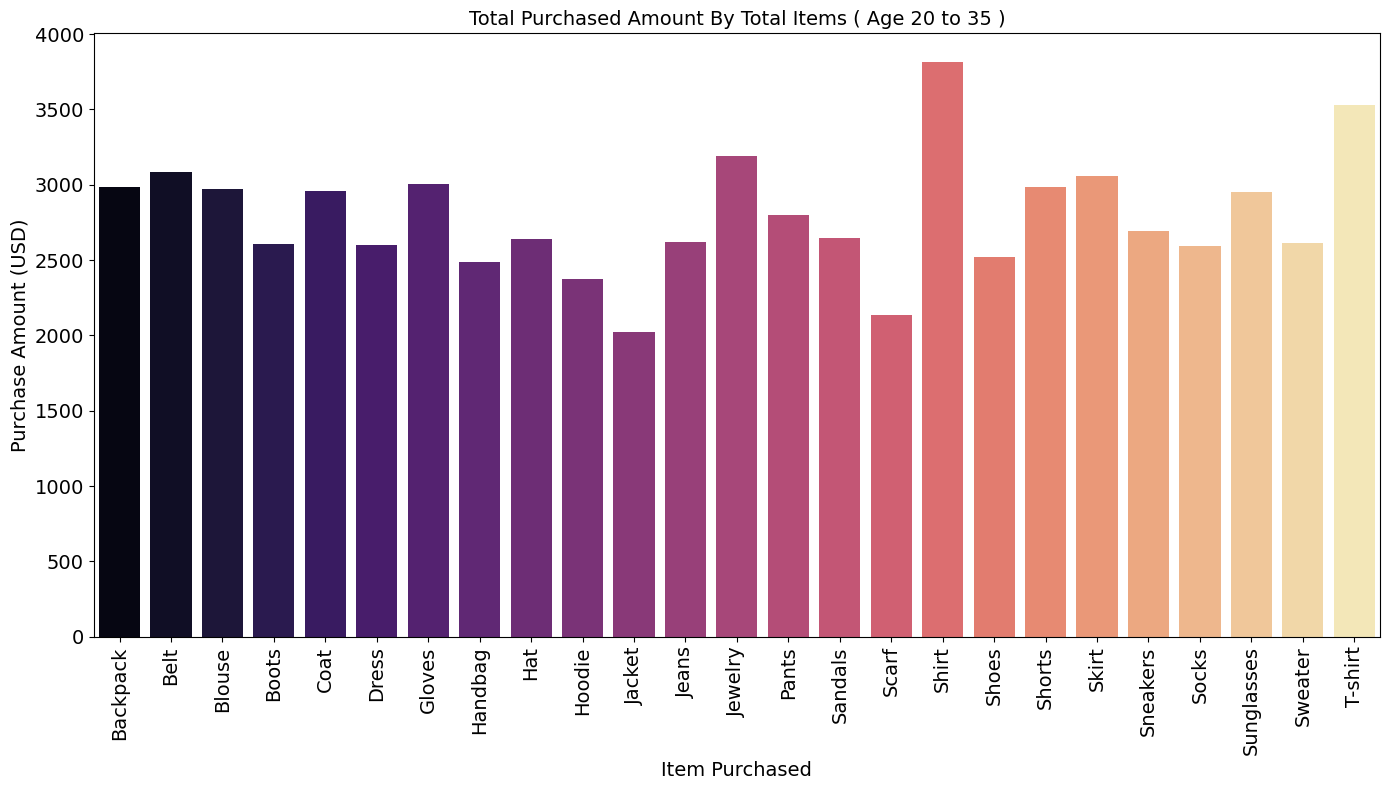

In [132]:
# Setting Figure Size
plt.figure(figsize=(14, 8))

# Creating Plot
sns.barplot(data = total_item_20_35, x='Item Purchased', y='Purchase Amount (USD)', hue='Item Purchased', palette='magma')

# Plotting Style
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.title('Total Purchased Amount By Total Items ( Age 20 to 35 )', fontsize=14)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()

# Saving the Figure
plt.savefig('D:/New folder (2)/4.png', dpi=300)

# Showing Plot
plt.show()

## Shopping of Customers Age From 20 to 35 By Gender

In [129]:
total_item_20_35 = shopp_df[(shopp_df['Age'] >= 20) & (shopp_df['Age'] <= 35)].pivot_table('Purchase Amount (USD)', index=['Item Purchased'], columns= ['Gender'], aggfunc=['sum'])
total_item_20_35.head()

sum      
Gender         Female  Male
Item Purchased             
Backpack         1011  1972
Belt             1082  2001
Blouse           1214  1760
Boots            1453  1152
Coat             1160  1799

<Figure size 1400x800 with 0 Axes>

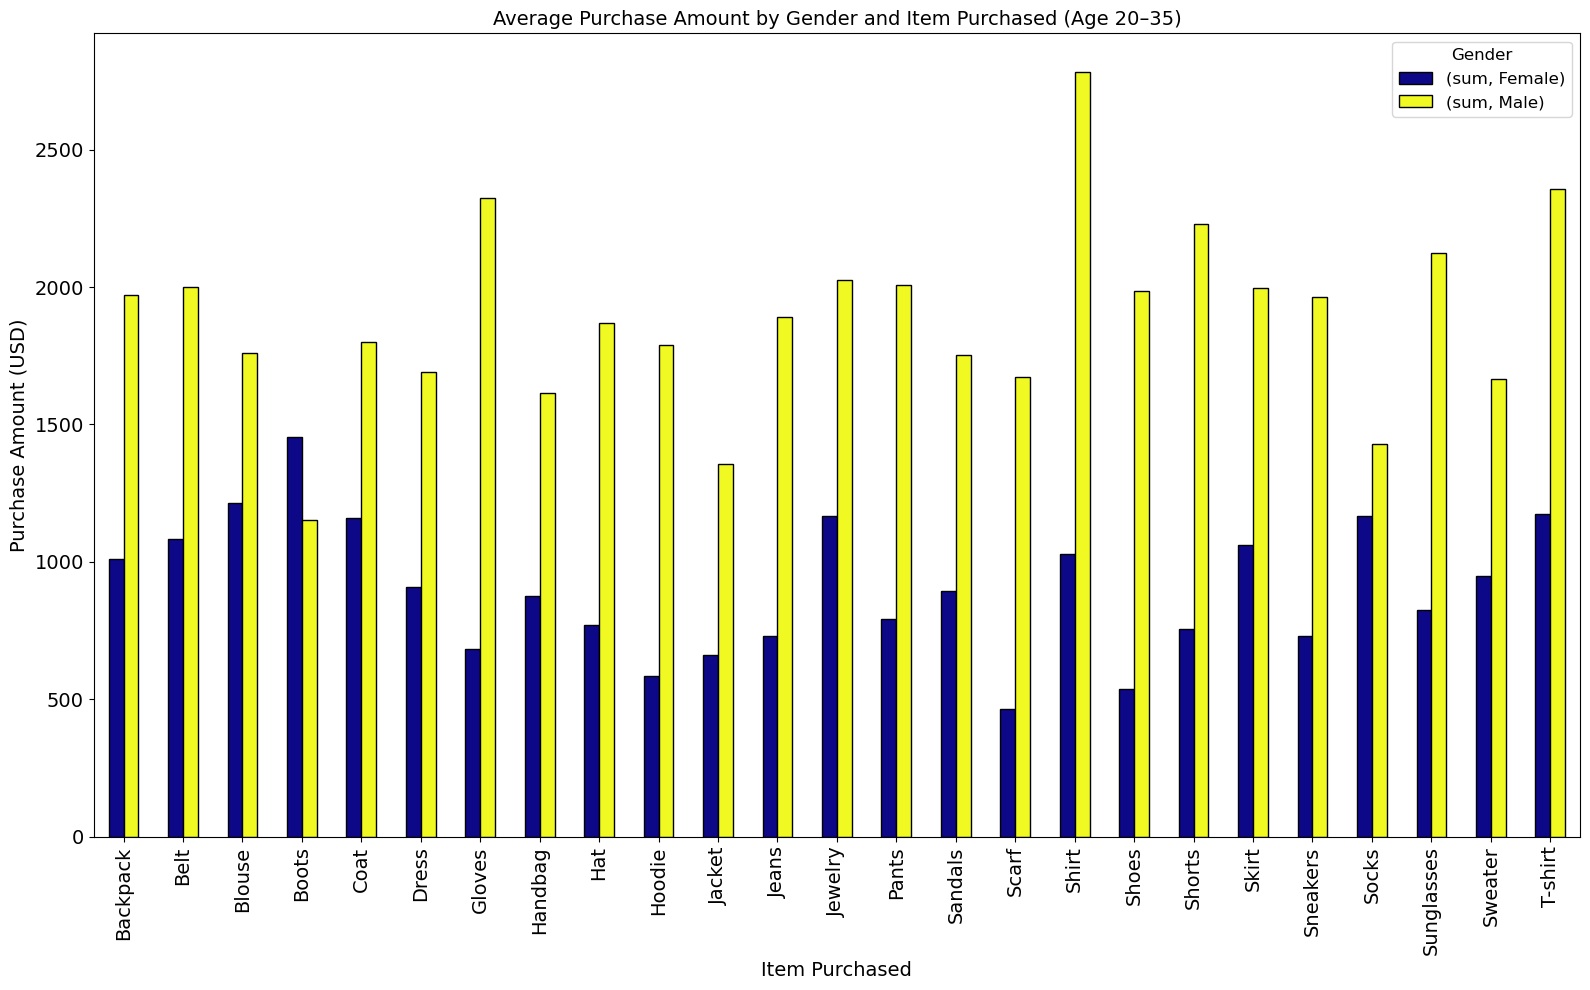

In [130]:
# Setting Figure Size
plt.figure(figsize=(14, 8))

# Creating Plot
total_item_20_35.plot.bar(figsize=(16, 10), fontsize=12, colormap='plasma', edgecolor='black')

# Plotting Style
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.title('Average Purchase Amount by Gender and Item Purchased (Age 20–35)', fontsize=14)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(title='Gender', title_fontsize=12, fontsize=12)
plt.tight_layout()

# Saving the Figure
plt.savefig('D:/New folder (2)/5.png', dpi=300)

# Showing Plot
plt.show()

## Shopping of Customers Age Greater than 35

In [127]:
total_item_greater_than_35 = shopp_df[shopp_df['Age'] > 35].groupby('Item Purchased')['Purchase Amount (USD)']\
.sum().reset_index()
total_item_greater_than_35.head()

,Item Purchased,Purchase Amount (USD)
0,Backpack,5349
1,Belt,6192
2,Blouse,7024
3,Boots,6091
4,Coat,5632


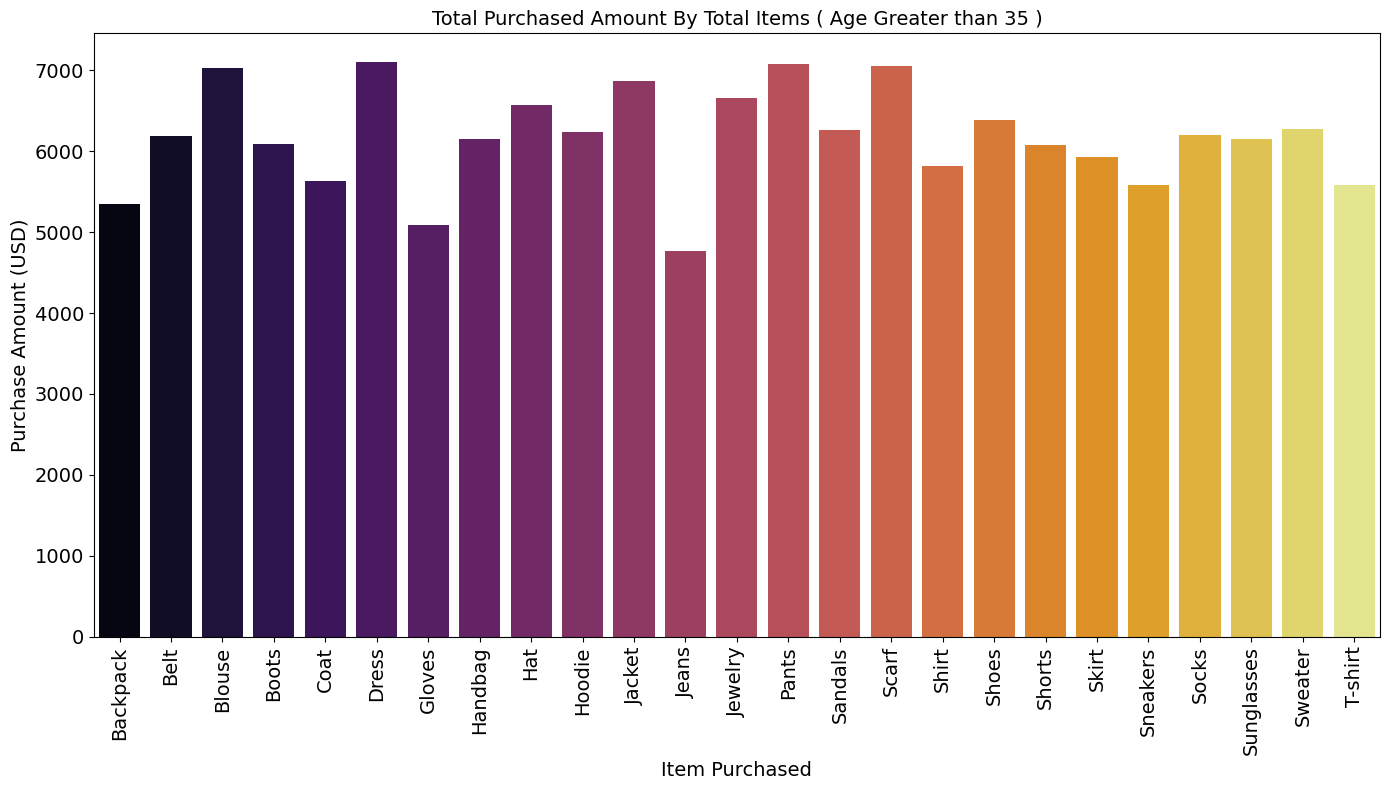

In [128]:
# Setting Figure Size
plt.figure(figsize=(14, 8))

# Creating Plot
sns.barplot(data = total_item_greater_than_35, x='Item Purchased', y='Purchase Amount (USD)', hue='Item Purchased', palette='inferno')

# Plotting Style
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.title('Total Purchased Amount By Total Items ( Age Greater than 35 )', fontsize=14)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()

# Saving the Figure
plt.savefig('D:/New folder (2)/6.png', dpi=300)

# Showing Plot
plt.show()

## Shopping of Customers Age Greater than 35 By Gender

In [125]:
total_item_greater_than_35 = shopp_df[shopp_df['Age'] > 35].pivot_table('Purchase Amount (USD)', index=['Item Purchased'], columns= ['Gender'], aggfunc=['sum'])
total_item_greater_than_35.head()

sum      
Gender         Female  Male
Item Purchased             
Backpack         1255  4094
Belt             2087  4105
Blouse           2667  4357
Boots            1702  4389
Coat             1351  4281

<Figure size 1400x800 with 0 Axes>

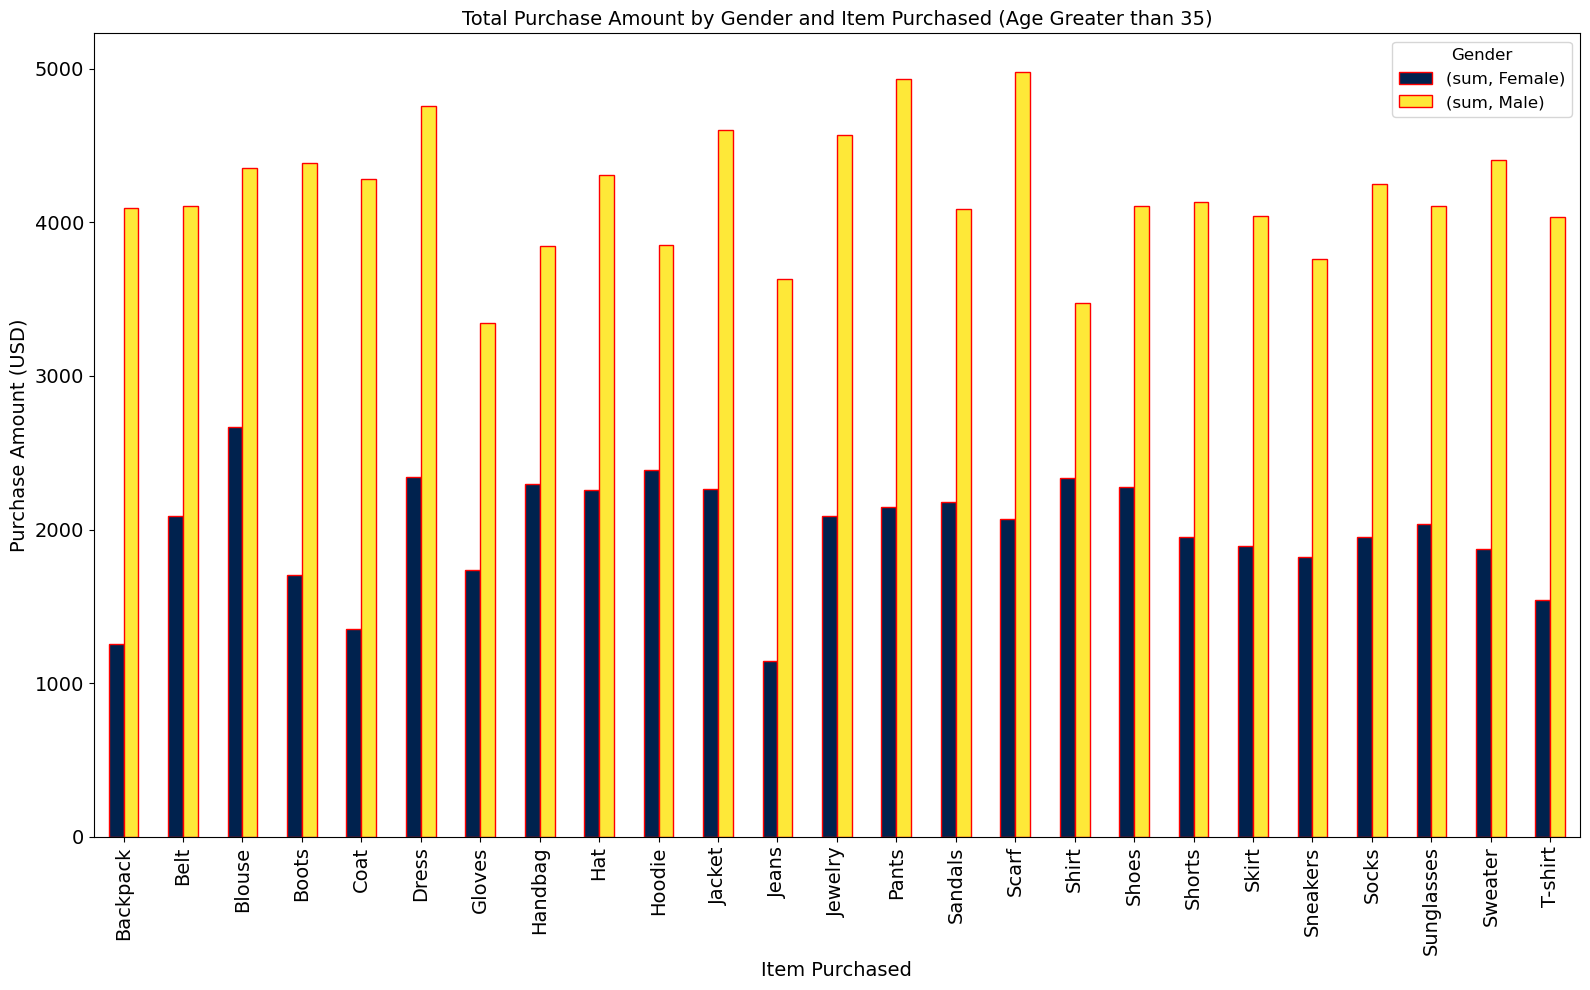

In [126]:
# Setting Figure Size
plt.figure(figsize=(14, 8))

# Creating Plot
total_item_greater_than_35.plot.bar(figsize=(16, 10), fontsize=12, colormap='cividis', edgecolor='red')

# Plotting Style
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.title('Total Purchase Amount by Gender and Item Purchased (Age Greater than 35)', fontsize=14)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(title='Gender', title_fontsize=12, fontsize=12)
plt.tight_layout()

# Saving the Figure
plt.savefig('D:/New folder (2)/7.png', dpi=300)

# Showing Plot
plt.show()

## Shopping By Gender, Season and Category

In [134]:
location = shopp_df.pivot_table('Purchase Amount (USD)', index=['Season', 'Gender'], columns= ['Category'], aggfunc=['sum'])
location

sum                            
Category      Accessories Clothing Footwear Outerwear
Season Gender                                        
Fall   Female        6730     9405     2507      1551
       Male         13144    16815     6158      3708
Spring Female        4785     8366     3843      1584
       Male         12222    19326     5712      2841
Summer Female        6257     7558     2760      1485
       Male         12771    15520     6633      2793
Winter Female        6047     8307     2725      1281
       Male         12244    18967     5755      3281

<Figure size 1400x800 with 0 Axes>

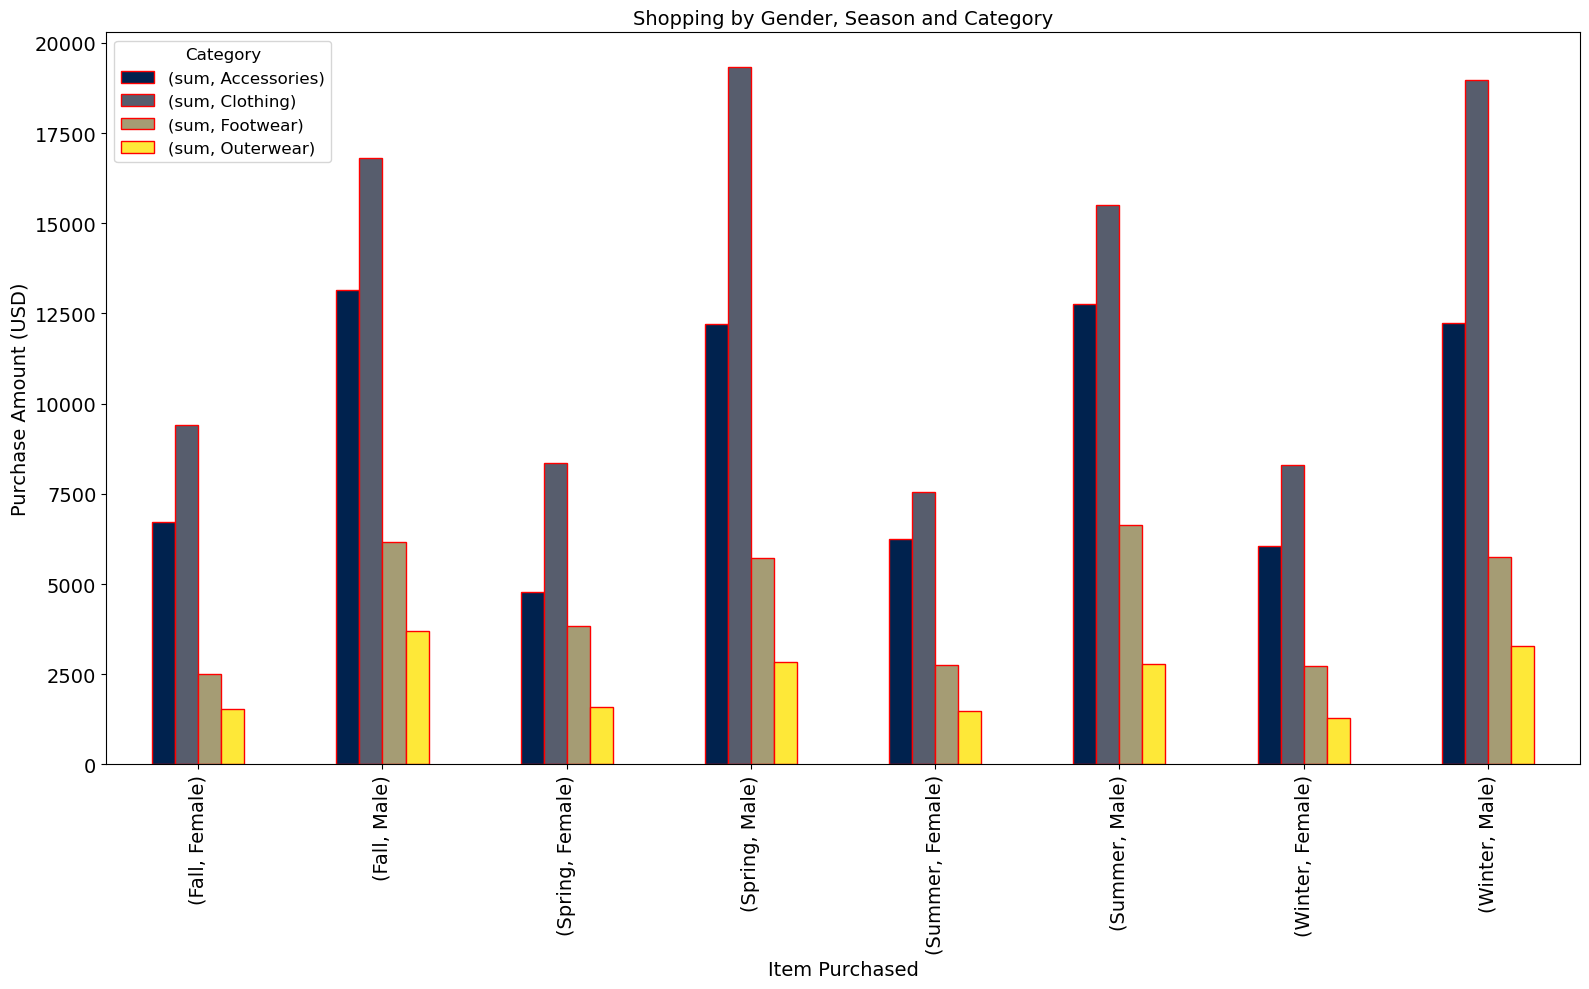

In [135]:
# Setting Figure Size
plt.figure(figsize=(14, 8))

# Creating Plot
location.plot.bar(figsize=(16, 10), fontsize=12, colormap='cividis', edgecolor='red')

# Plotting Style
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.title('Shopping by Gender, Season and Category', fontsize=14)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(title='Category', title_fontsize=12, fontsize=12)
plt.tight_layout()

# Saving the Figure
plt.savefig('D:/New folder (2)/8.png', dpi=300)

# Showing Plot
plt.show()